# Imports and settings

In [ ]:
import os
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/avocado?"

Mounted at /content/drive


In [ ]:
# Get equation from solution file/AI Feynman output
files = sorted(os.listdir(path + '/ai_feynman/results/'))
print(files, '\n') # See existing files

['00_solution_sdss_photz.txt', '01_solution_gri_train_noramlized.txt', '02_solution_sdss_photz_pol_deg_2_TPU.txt', '03_solution_sdss_colors.txt', '04_solution_sdss_photz_pol_deg_2.txt', '05_solution_select_colors_photz_4K.txt', '06_solution_sdss_photz_train_normalized_pol_deg_3.txt', '07_solution_star_QSO_train.txt', 'solution_sdss_color_train.txt'] 



In [ ]:
filename = files[0] # <--------------- Choose one!

print('Using ***', filename, '*** with last line') # Just to be sure
with open(path + "/ai_feynman/results/" + filename, "r") as file:
  first_line = file.readline()
  for last_line in file:
    pass

print(last_line) # To be sure we get the right expression in the next step

# Print only the equation that we need to use to define our model
for i in range(5):
  eq_start = 1+last_line.find(" ")
  last_line = last_line[eq_start:]

print('Equation:\n', last_line)

Using *** 00_solution_sdss_photz.txt *** with last line
24.698752840393407 4.625451070497341 18834.836759065172 954.5453657467092 24.683089371569125 ((exp(x0 - x4) + pi)*(-0.0564922837312031*x1**3 + 0.171777192102106*x1**2*x2 + 0.000466142569650663*x1**2*x3 + 0.294444065853136*x1**2 - 0.0562042453694747*x1*x2**2 - 0.147870313931707*x1*x2*x3 - 2.63241597157939*x1*x2 + 0.0261173539904685*x1*x3**2 + 1.99437153105907*x1*x3 + 1.55538923121323*x1 - 0.319569307140498*x2**3 + 0.949603665737626*x2**2*x3 + x2**2*log(1 + 2*pi*(3 + 4*pi))/2 - 0.960448246732852*x2*x3**2 + 2.19795133730747*x2*x3 - 38.7021673671032*x2 + 0.400348882380776*x3**3 - 4.49296387512394*x3**2 + 42.0587372097645*x3 - 22.725957717616) + 1)/(exp(x0 - x4) + pi)

Equation:
 ((exp(x0 - x4) + pi)*(-0.0564922837312031*x1**3 + 0.171777192102106*x1**2*x2 + 0.000466142569650663*x1**2*x3 + 0.294444065853136*x1**2 - 0.0562042453694747*x1*x2**2 - 0.147870313931707*x1*x2*x3 - 2.63241597157939*x1*x2 + 0.0261173539904685*x1*x3**2 + 1.9943715

In [ ]:
from sympy import *
u,g,r,i,z = symbols('x0 x1 x2 x3 x4')
init_printing(use_unicode=True)

In [ ]:
simplify(((exp(x0 - x4) + pi)*(-0.0564922837312031*x1**3 + 0.171777192102106*x1**2*x2 + 0.000466142569650663*x1**2*x3 + 0.294444065853136*x1**2 - 0.0562042453694747*x1*x2**2 - 0.147870313931707*x1*x2*x3 - 2.63241597157939*x1*x2 + 0.0261173539904685*x1*x3**2 + 1.99437153105907*x1*x3 + 1.55538923121323*x1 - 0.319569307140498*x2**3 + 0.949603665737626*x2**2*x3 + x2**2*log(1 + 2*pi*(3 + 4*pi))/2 - 0.960448246732852*x2*x3**2 + 2.19795133730747*x2*x3 - 38.7021673671032*x2 + 0.400348882380776*x3**3 - 4.49296387512394*x3**2 + 42.0587372097645*x3 - 22.725957717616) + 1)/(exp(x0 - x4) + pi))

NameError: ignored

In [ ]:
simplify(-0.0019192791111956*(x0*x4)**3 + 0.0217473697922449*(x0*x4)**2*x1 + 0.0666486569586377*(x0*x4)**2*x2 - 0.0893207961196446*(x0*x4)**2*x3 + 0.0184464806063696*(x0*x4)**2 + 0.0786532272889053*(x0*x4)*x1**2 - 0.48260290196814*(x0*x4)*x1*x2 + 0.341084803875805*(x0*x4)*x1*x3 - 0.0064994188397717*(x0*x4)*x1 + 0.678992532616086*(x0*x4)*x2**2 - 0.624066336228769*(x0*x4)*x2*x3 - 0.206831059680393*(x0*x4)*x2 + 0.0123712598684785*(x0*x4)*x3**2 + 0.187286212401485*(x0*x4)*x3 - 0.0409785108785798*(x0*x4) - 0.12845438135494*x1**3 - 0.303379401237279*x1**2*x2 + 0.491807344074495*x1**2*x3 + 0.634871328312793*x1**2 + 2.76870376980087*x1*x2**2 - 3.69830892082187*x1*x2*x3 - 2.30614341954857*x1*x2 + 1.09136146745568*x1*x3**2 + 0.862808253725225*x1*x3 - 0.0681863835264691*x1 - 3.17868694037468*x2**3 + 4.05089059628818*x2**2*x3 + 1.96255946044831*x2**2 - 0.458051457750808*x2*x3**2 - 1.62362764558844*x2*x3 + 1.07350154169535*x2 - 0.632640023193068*x3**3 + 0.458835752521148*x3**2 - 0.781154993706883*x3 + 0.405147301973261)

# Our trials

In a section, so we can hide it :)

In [ ]:
df = {} # To store all dataframes, for all the models, so we can compare easily
residuals = {} # To store all residuals
labels = {} # For plots

In [ ]:
# You can duplicate this block and define a new model and 'residuals' key
# so we can call any model and residuals later, for comparison


# Surely methods could be dynamically generated if this was a class... but it's late, sorry!
# Name your model again :c
model_name = 'trial00' # We define a function, dict, and keys given this
def trial00(df):
  x0 = df["u"]
  x1 = df["g"]
  x2 = df["r"]
  x3 = df["i"]
  x4 = df["z"]

  return ((np.exp(x0 - x4) + np.pi)*(-0.0564922837312031*x1**3 + 0.171777192102106*x1**2*x2\
        + 0.000466142569650663*x1**2*x3 + 0.294444065853136*x1**2\
        - 0.0562042453694747*x1*x2**2 - 0.147870313931707*x1*x2*x3\
        - 2.63241597157939*x1*x2 + 0.0261173539904685*x1*x3**2 + 1.99437153105907*x1*x3\
        + 1.55538923121323*x1 - 0.319569307140498*x2**3 + 0.949603665737626*x2**2*x3\
        + x2**2*np.log(1 + 2*np.pi*(3 + 4*np.pi))/2 - 0.960448246732852*x2*x3**2\
        + 2.19795133730747*x2*x3 - 38.7021673671032*x2 + 0.400348882380776*x3**3\
        - 4.49296387512394*x3**2 + 42.0587372097645*x3\
        - 22.725957717616) + 1)/(np.exp(x0 - x4) + np.pi)

labels[model_name] = 'AI Feynman, full SDSS subsample'
df[model_name] = pd.read_csv(path + "/data/sdss_photz.csv") # Input data for AI Feynman
#df[model_name].head()
residuals[model_name] = globals()[model_name](df[model_name]) - df[model_name]['zred']

In [ ]:
def Taylor_polynomial_sympy(function_expression, variable_list, evaluation_point, degree):
    """
    Mathematical formulation reference:
    https://math.libretexts.org/Bookshelves/Calculus/Supplemental_Modules_(Calculus)/Multivariable_Calculus/3%3A_Topics_in_Partial_Derivatives/Taylor__Polynomials_of_Functions_of_Two_Variables
    :param function_expression: Sympy expression of the function
    :param variable_list: list. All variables to be approximated (to be "Taylorized")
    :param evaluation_point: list. Coordinates, where the function will be expressed
    :param degree: int. Total degree of the Taylor polynomial
    :return: Returns a Sympy expression of the Taylor series up to a given degree, of a given multivariate expression, approximated as a multivariate polynomial evaluated at the evaluation_point
    """
    from sympy import factorial, Matrix, prod
    import itertools

    n_var = len(variable_list)
    point_coordinates = [(i, j) for i, j in (zip(variable_list, evaluation_point))]  # list of tuples with variables and their evaluation_point coordinates, to later perform substitution

    deriv_orders = list(itertools.product(range(degree + 1), repeat=n_var))  # list with exponentials of the partial derivatives
    deriv_orders = [deriv_orders[i] for i in range(len(deriv_orders)) if sum(deriv_orders[i]) <= degree]  # Discarding some higher-order terms
    n_terms = len(deriv_orders)
    deriv_orders_as_input = [list(sum(list(zip(variable_list, deriv_orders[i])), ())) for i in range(n_terms)]  # Individual degree of each partial derivative, of each term

    polynomial = 0
    for i in range(n_terms):
        partial_derivatives_at_point = function_expression.diff(*deriv_orders_as_input[i]).subs(point_coordinates)  # e.g. df/(dx*dy**2)
        denominator = prod([factorial(j) for j in deriv_orders[i]])  # e.g. (1! * 2!)
        distances_powered = prod([(Matrix(variable_list) - Matrix(evaluation_point))[j] ** deriv_orders[i][j] for j in range(n_var)])  # e.g. (x-x0)*(y-y0)**2
        polynomial += partial_derivatives_at_point / denominator * distances_powered
    return polynomial

In [ ]:
function_expression = -0.0019192791111956*(x0*x4)**3 + 0.0217473697922449*(x0*x4)**2*x1 + 0.0666486569586377*(x0*x4)**2*x2 - 0.0893207961196446*(x0*x4)**2*x3 + 0.0184464806063696*(x0*x4)**2 + 0.0786532272889053*(x0*x4)*x1**2 - 0.48260290196814*(x0*x4)*x1*x2 + 0.341084803875805*(x0*x4)*x1*x3 - 0.0064994188397717*(x0*x4)*x1 + 0.678992532616086*(x0*x4)*x2**2 - 0.624066336228769*(x0*x4)*x2*x3 - 0.206831059680393*(x0*x4)*x2 + 0.0123712598684785*(x0*x4)*x3**2 + 0.187286212401485*(x0*x4)*x3 - 0.0409785108785798*(x0*x4) - 0.12845438135494*x1**3 - 0.303379401237279*x1**2*x2 + 0.491807344074495*x1**2*x3 + 0.634871328312793*x1**2 + 2.76870376980087*x1*x2**2 - 3.69830892082187*x1*x2*x3 - 2.30614341954857*x1*x2 + 1.09136146745568*x1*x3**2 + 0.862808253725225*x1*x3 - 0.0681863835264691*x1 - 3.17868694037468*x2**3 + 4.05089059628818*x2**2*x3 + 1.96255946044831*x2**2 - 0.458051457750808*x2*x3**2 - 1.62362764558844*x2*x3 + 1.07350154169535*x2 - 0.632640023193068*x3**3 + 0.458835752521148*x3**2 - 0.781154993706883*x3 + 0.405147301973261
variable_list = [x0, x1 ,x2, x3, x4]
evaluation_point = [0,0,0,0,0]
degree = 2
simplify(Taylor_polynomial_sympy(function_expression, variable_list, evaluation_point, degree))

NameError: ignored

In [ ]:
model_name = 'trial02'
def trial02(df):
  x0 = df['u']
  x1 = df['g']
  x2 = df['r']
  x3 = df['i']
  x4 = df['z']

  return (np.pi*x2 + (0.0244923971797571*x0 - 0.0153193147340895*x1**2 - 
         0.0021305540315959*x1*x2 + 0.00351742917384151*x1*x3 + 
         0.0300144718738858*x1*(x0 - x4) + 0.49259294963876*x1 - 
         0.116321680285126*x2**2 + 0.211928996396964*x2*x3 - 
         0.0360984335336699*x2*(x0 - x4) - 0.0686795013757676*x3**2 + 
         0.00054286371738356*x3*(x0 - x4) - 2.11336895142524*x3 - 
         0.0244923971797571*x4 + 0.00229576549125733*(x0 - x4)**2 + 
         1.713771969418)*np.exp(np.sqrt(np.pi)/2))*np.exp(-np.sqrt(np.pi)/2)


labels[model_name] = 'Full set, original values, order 2 pol (TPU)'
df[model_name] = pd.read_csv(path + "/data/sdss_photz.csv")
#df[model_name].head()
residuals[model_name] = globals()[model_name](df[model_name]) - df[model_name]['zred']

In [ ]:
model_name = 'trial04'
def trial04(df):
  x0 = df['u']
  x1 = df['g']
  x2 = df['r']
  x3 = df['i']
  x4 = df['z']

  return np.arcsin(0.00364106456495578*(x0-x4)**2 + 0.00935559888638492*(x0-x4)*x1 + 
                   0.0202865678980835*(x0-x4)*x2 - 0.0357180374409493*(x0-x4)*x3 + 
                   0.0294184130151114*(x0-x4) + 0.0199326469927313*x1**2 - 
                   0.18814587026091*x1*x2 + 0.138842218953198*x1*x3 + 
                   0.201323642644036*x1 + 0.128718121959199*x2**2 - 
                   0.149798700852908*x2*x3 + 2.07345980355022*x2 + 
                   0.0623283530319557*x3**2 - 2.56053981985059*x3 
                   + 1.38935772520873)


labels[model_name] = 'Full set, original values, order 2 pol (FDO\'s GPU)'
df[model_name] = pd.read_csv(path + "/data/sdss_photz.csv")
#df[model_name].head()
residuals[model_name] = globals()[model_name](df[model_name]) - df[model_name]['zred']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
model_name = 'trial05'

# AI Feynman Trial completed on [u-g, g-r, r-i] (ssds_colors.txt) & [u,g,r,zred] (ssds_photz.txt) columns
#   - Polyfit_deg = 2
#   - Epochs = 400 


# Resulted in a few low complexity (seemingly) good equations:
#   1. (0.182809635996819 - 0.182002350687981*np.cos(x2 + 1.05003106594086))**0.638950169086456
#   2. np.tan(0.161391481757164*x5 + 0.348664665459744)
#   3. np.tan(x4*np.exp(-np.sqrt(np.pi)) + 0.348971692165472)




def trial05(df):
  x0 = df['u-g']
  x1 = df['g-r']
  x2 = df['r-i']
  x3 = df['u']
  x4 = df['g']
  x5 = df['r']

  return (0.182809635996819 - 0.182002350687981*np.cos(x2 + 1.05003106594086))**0.638950169086456

labels[model_name] = 'Columns: [u-g, g-r, r-i] (ssds_colors.txt) & [u,g,r,zred] (ssds_photz.txt), original values'
df[model_name] = pd.read_csv(path + "/data/select_colors_photz_4K.txt", sep=' ', names=['u-g','g-r','r-i','u','g','r','zred']) # Input data (didn't make .csv in /data so added sep,names args)
#df[model_name].head()
residuals[model_name] = globals()[model_name](df[model_name]) - df[model_name]['zred']

In [ ]:
model_name = 'trial06'
def trial06(df):
  x0 = df['u']
  x1 = df['g']
  x2 = df['r']
  x3 = df['i']
  x4 = df['z']

  return (-0.0019192791111956*(x0*x4)**3 + 0.0217473697922449*(x0*x4)**2*x1 + 
          0.0666486569586377*(x0*x4)**2*x2 - 0.0893207961196446*(x0*x4)**2*x3 + 
          0.0184464806063696*(x0*x4)**2 + 0.0786532272889053*(x0*x4)*x1**2 - 
          0.48260290196814*(x0*x4)*x1*x2 + 0.341084803875805*(x0*x4)*x1*x3 - 
          0.0064994188397717*(x0*x4)*x1 + 0.678992532616086*(x0*x4)*x2**2 - 
          0.624066336228769*(x0*x4)*x2*x3 - 0.206831059680393*(x0*x4)*x2 + 
          0.0123712598684785*(x0*x4)*x3**2 + 0.187286212401485*(x0*x4)*x3 - 
          0.0409785108785798*(x0*x4) - 0.12845438135494*x1**3 - 
          0.303379401237279*x1**2*x2 + 0.491807344074495*x1**2*x3 + 
          0.634871328312793*x1**2 + 2.76870376980087*x1*x2**2 - 
          .69830892082187*x1*x2*x3 - 2.30614341954857*x1*x2 + 
          1.09136146745568*x1*x3**2 + 0.862808253725225*x1*x3 - 
          0.0681863835264691*x1 - 3.17868694037468*x2**3 + 
          4.05089059628818*x2**2*x3 + 1.96255946044831*x2**2 - 
          0.458051457750808*x2*x3**2 - 1.62362764558844*x2*x3 + 
          1.07350154169535*x2 - 0.632640023193068*x3**3 + 
          0.458835752521148*x3**2 - 0.781154993706883*x3 + 0.405147301973261)

labels[model_name] = 'Train ugriz set, pol deg 3, fdo\'s GPU'
df[model_name] = pd.read_csv(path + "/data/sdss_photz_test_normalized.txt", sep=' ', names=['u', 'g', 'r', 'i', 'z', 'zred']) # Input data (didn't make .csv in /data so added sep,names args)
#df[model_name].head()
residuals[model_name] = globals()[model_name](df[model_name]) - df[model_name]['zred']

In [ ]:
model_name = 'krone_martins'
def krone_martins(df):
  g = df["g"]
  r = df["r"]
  i = df["i"]
  
  return (0.4436*r - 8.261)  / (24.4 + \
    ((g-r)*(g-i)*(r-i))**2 - g) + 0.5152*(r-i)

labels[model_name] = 'Krone-Martins'
df[model_name] = pd.read_csv(path + "/data/sdss_photz.csv")
#df[model_name].head()
residuals[model_name] = globals()[model_name](df[model_name]) - df[model_name]['zred']

In [ ]:
labels

{'krone_martins': 'Krone-Martins',
 'trial00': 'Full set, original values',
 'trial02': 'Full set, original values, order 2 pol (TPU)',
 'trial04': "Full set, original values, order 2 pol (FDO's GPU)",
 'trial05': 'Columns: [u-g, g-r, r-i] (ssds_colors.txt) & [u,g,r,zred] (ssds_photz.txt), original values',
 'trial06': "Train ugriz set, pol deg 3, fdo's GPU"}

# Plots

In [ ]:
# Receives any number of 'models' 

def makeplots(models):
  # Makes a list if only one model is present, and it's not a list
  if not isinstance(models, list): models = [models]

  '''
  plt.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "cm",
    "font.family": "serif",
    "font.serif": ["cmr10"],
    "font.size": 20,
    "legend.fontsize": 12,
    "axes.unicode_minus": False,
  })
  '''

  fig, axes = plt.subplots(1, 2, figsize=(18,7), dpi=200)

  '''
  for ax in axes:
    ax.tick_params(which='both', direction='in', top=True, right=True, color='k')
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=4)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

  '''
  range_vals = [-1, 1] # Do not use potential outliers

  for (model, n, mycolor) in zip(models, range(len(models)), ["dodgerblue", "firebrick"]):
    axes[0].hist(residuals[model], bins = 50, color=mycolor, alpha = 0.3, label = labels[model], range=range_vals)
    axes[1].scatter(df[model]["zred"], residuals[model], color=mycolor, alpha = 0.3, label = labels[model])

  axes[0].legend()
  axes[0].set_title('Residuals')
  axes[0].set_xlabel('Residuals amplitude')
  axes[0].set_ylabel('Number')

  axes[1].set_ylim(-0.5, 1.5)

  axes[1].legend()
  axes[1].set_title('Residuals as a function of redshift')
  axes[1].set_xlabel('Spectroscopic redshift')
  axes[1].set_ylabel('Residuals amplitude')
  axes[1].set_ylim(-1.2,1.2)

  plt.savefig(path + '/' + '_'.join(models) + '.png', bbox_inches='tight')
  plt.show()
  plt.close()

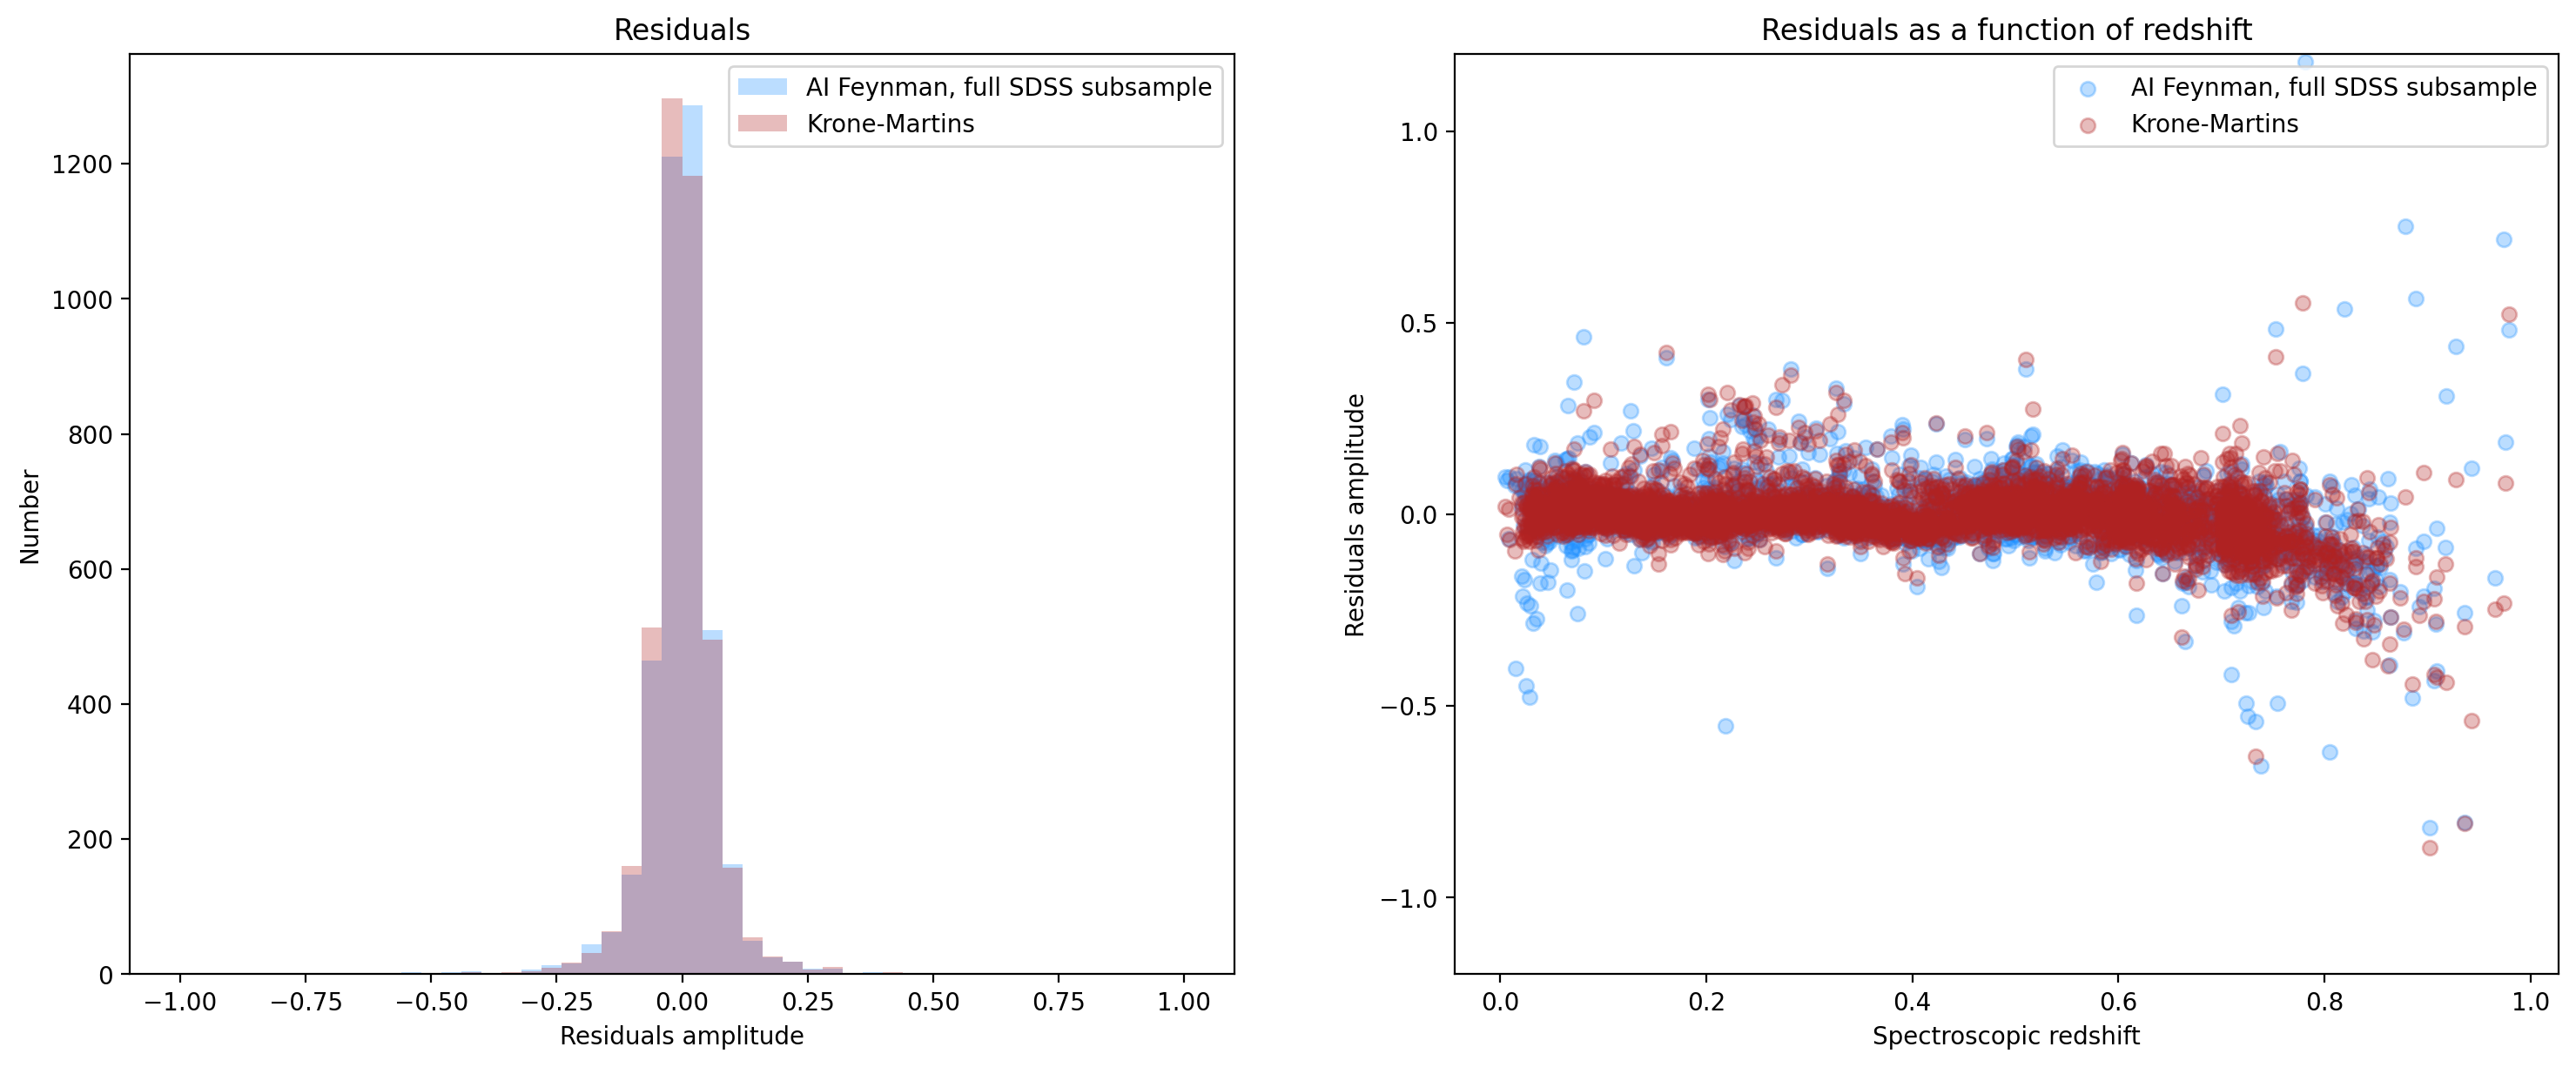

In [ ]:
makeplots(['trial00', 'krone_martins'])

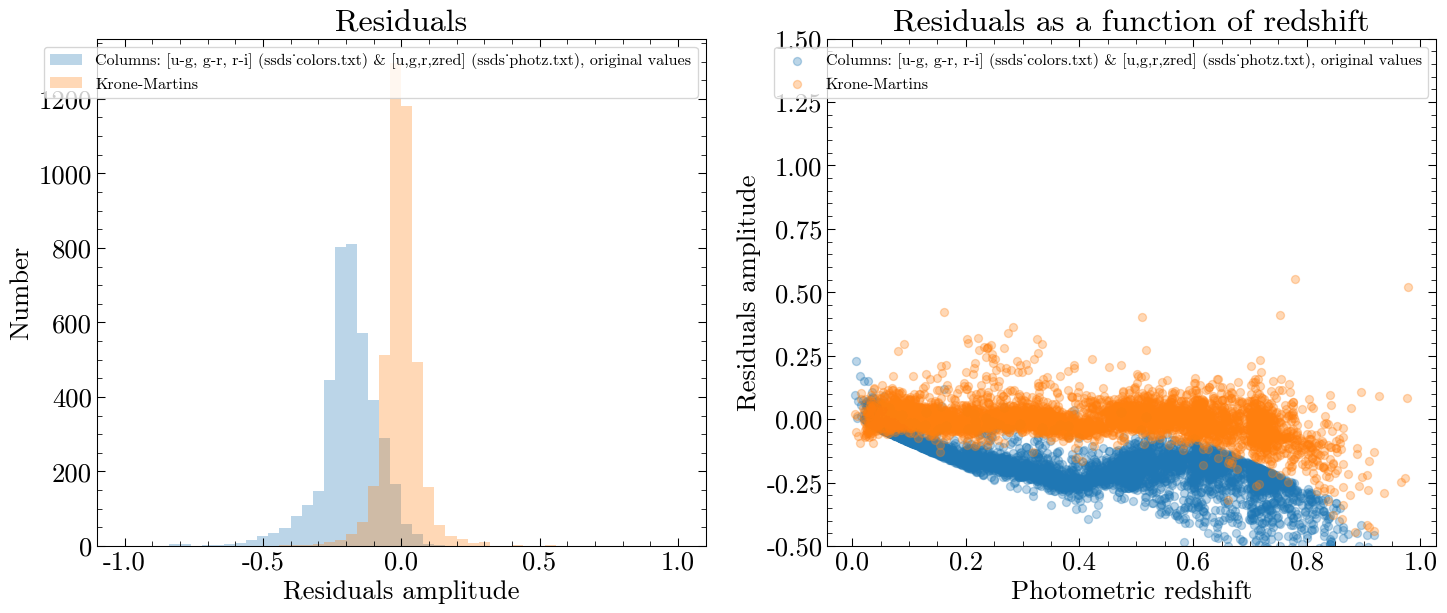

In [ ]:
makeplots(['trial05', 'krone_martins'])

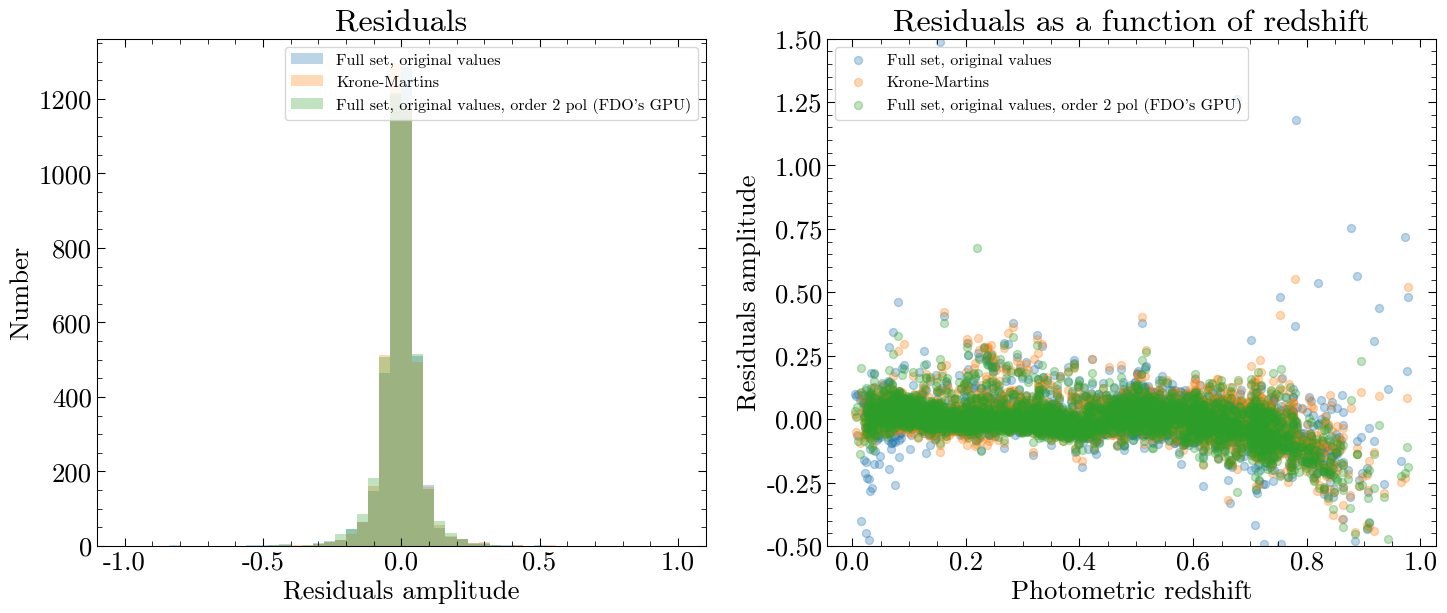

In [ ]:
makeplots(['trial00', 'krone_martins'])

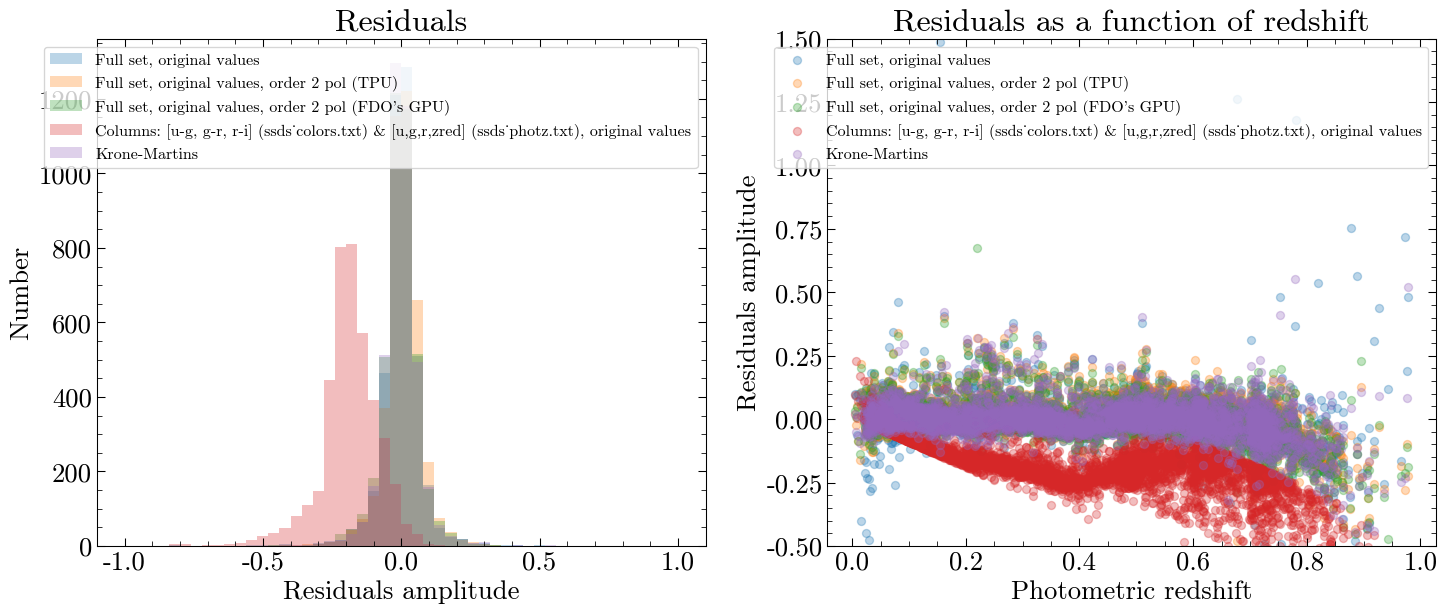

In [ ]:
makeplots(['trial00','trial02','trial04','trial05','krone_martins'])